# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm

# 1. Import Data

In [2]:
data = pd.read_csv('Data/Criminal_prediction.csv')

In [3]:
data

,Age,Height,Label
0,28.484809,153.668743,0
1,29.993929,148.384908,0
2,29.742948,142.775525,0
3,28.204357,136.699098,0
4,30.627606,137.204925,0
5,31.465649,137.742237,0
6,30.217208,135.352328,0
7,29.108457,140.697043,0
8,28.257778,134.539582,0
9,29.639034,151.593298,0


# 圖示化資料

在圖上紅色點表示為壞人(1)，藍色點是好人(0)，今天身為一位警察該如何透過兩個feature從好人中去抓出壞人呢？
這邊產生的資料只有10%是壞人 90%是好人

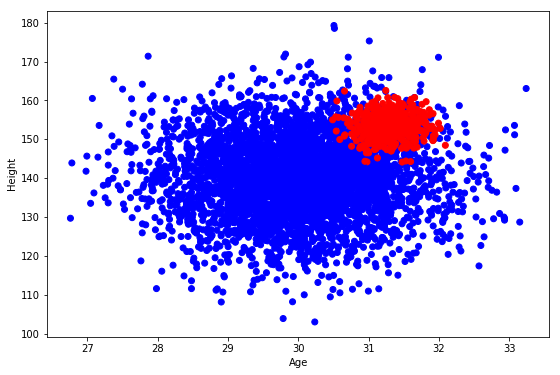

In [4]:
color = "br"
color = [color[data.Label[i]] for i in range(len(data.Label))]
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=color)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()

# 2. Predict with Logistic Regression

In [5]:
#觀察好壞人的比例
print('Good Citizens', sum((data['Label']==0).astype(int)))
print('Criminals', sum((data['Label']==1).astype(int)))

Good Citizens 4500
Criminals 500


In [6]:
#train test split
from sklearn.model_selection import train_test_split
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:2].values, data.iloc[:,2:3].values, test_size=0.33, 
                                                    random_state=40, shuffle=True)

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:0.89


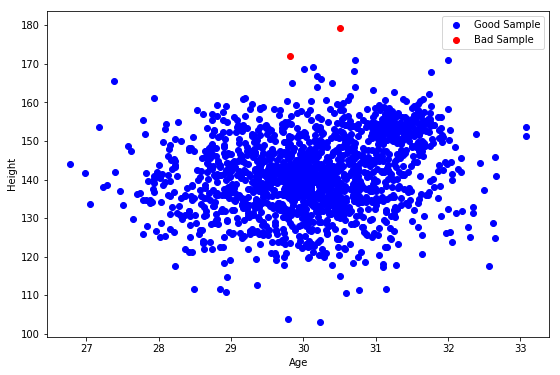

In [7]:
#train and predict with logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy:%.2f'%model.score(X_test, y_test))
color = "br"
label = ['Good Sample', 'Bad Sample']
for i in range(2):
    plt.scatter(X_test[np.where(prediction==i),0],X_test[np.where(prediction==i),1],c=color[i], label=label[i])
plt.legend()    
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# 3. Normalization

In [8]:
print('Age mean:%.2f'%np.mean(data.iloc[:,0].values))
print('Age stdev:%.2f'%np.std(data.iloc[:,0].values))
print('Height mean:%.2f'%np.mean(data.iloc[:,1].values))
print('Height stdev:%.2f'%np.std(data.iloc[:,1].values))

Age mean:30.13
Age stdev:0.99
Height mean:141.28
Height stdev:9.99


In [9]:
from sklearn.preprocessing import scale
normalize_X = scale(data.iloc[:,0:2].values, axis=0) # 經過scale後會自動轉成numpy array

In [10]:
print('Age mean:%.2f'%np.mean(normalize_X[:,0], axis=0))
print('Age stdev:%.2f'%np.std(normalize_X[:,0], axis=0))
print('Height mean:%.2f'%np.mean(normalize_X[:,1], axis=0))
print('Height stdev:%.2f'%np.std(normalize_X[:,1], axis=0))

Age mean:0.00
Age stdev:1.00
Height mean:-0.00
Height stdev:1.00


/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:0.93


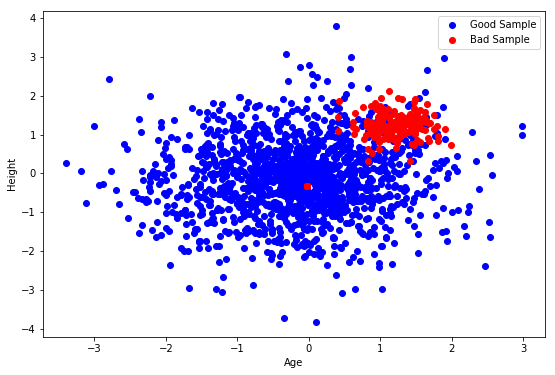

In [11]:
X_train, X_test, y_train, y_test = train_test_split(normalize_X, data.iloc[:,2:3].values, test_size=0.33, 
                                                    random_state=40, shuffle=True)
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy:%.2f'%model.score(X_test, y_test))
color = "br"
label = ['Good Sample', 'Bad Sample']
for i in range(2):
    plt.scatter(X_test[np.where(y_test==i),0],X_test[np.where(y_test==i),1],c=color[i], label=label[i])
plt.legend()    
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# 4. Precision&  Recall

In [12]:
cm = metrics.confusion_matrix(y_test, prediction)
pre = metrics.precision_score(y_test, prediction) #precision亦可用confusion matrix寫成cm[1][1]/cm.sum(axis=0)[1]
re = metrics.recall_score(y_test, prediction) #recall亦可用confusion matrix寫成cm[1][1]/cm.sum(axis=1)[1]
print('precision:%.2f'%pre)
print('recall:%.2f'%re)

precision:0.68
recall:0.60


# 5. Tune Threshold
在分類問題中，不管logistic regression還是svm在求解maxmum likelyhood，因此最後算出來的邊界都是一個軟性邊界（機率分佈）。例如在上例中logistic regression預測出來model.predict_proba(X)如下，第一欄代表被預測為0（好人）的機率，第二欄代表被預測為1（壞人）的機率。在一般model.predict給出的預測測值是直接比較第一欄和第二欄的大小決定的。例如在這裏第一筆資料被預測為0（好人）的機率為0.9812，被預測為0.01879，因此模型就會預測這筆資料為0。但是在imbalanced data的情況下，我們會去調整threshold以達到目的。假設我們在這個case中想要抓出大部分的壞人，那也許我們的決策也許是要設定被預測為1的機率只要大於20%那我們就認定他是壞人，如此的話就可以抓出大部分的壞人，那20%就是我們所設定的threshold。之前有提到一般以F1_score來權衡precision和recall，因此在這樣的case下我們會去調整threshold來求得最大的F1_score。

In [13]:
#利用預測機率代替預測結果
print(model.predict_proba(X_test))

[[  9.96415613e-01   3.58438743e-03]
 [  2.12000913e-01   7.87999087e-01]
 [  6.77241638e-01   3.22758362e-01]
 ..., 
 [  9.93320428e-01   6.67957152e-03]
 [  9.99312697e-01   6.87302972e-04]
 [  9.95072793e-01   4.92720680e-03]]


In [14]:
threshold = 1
prediction = (model.predict_proba(X_test)[:,1] >= threshold).astype(int) #將預測機率大於threshold的分類為1
pre = metrics.precision_score(y_test, prediction) #precision亦可用confusion matrix寫成cm[1][1]/cm.sum(axis=0)[1]
re = metrics.recall_score(y_test, prediction) #recall亦可用confusion matrix寫成cm[1][1]/cm.sum(axis=1)[1]
print('precision:%.2f'%pre)
print('recall:%.2f'%re)

precision:0.00
recall:0.00


/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# 6. Best Threshold (F1_score)

In [15]:
"""
定義function比較各個不同threshold所形成的分類圖。
這邊主要是要將分類問圖形化給大家看，如果看不懂的話只要知道fucntion的輸入為
1. model_type: 可選擇Logistic 或 SVC
2. plot_dict: key值為設定的threshold，value代表的是subplot的index
"""
def tune_threshold(model_type, plot_dict, X, y):
    model_dict = {'Logistic':LogisticRegression(),
                  'SVC':svm.SVC(kernel='rbf', probability= True),}

    model = model_dict[model_type]
    model.fit(X, y)
    tpr_temp=[]
    fpr_temp=[]
    precision_temp=[]
    recall_temp=[]
    f1_score_temp=[]
    for  threshold in plot_dict:
        pred = (model.predict_proba(X)[:,1] >= threshold).astype(int) #將預測機率大於threshold的分類為1
        #先算出confusion matrix在算出其他評估值
        cm = metrics.confusion_matrix(y, pred)
        tpr = cm[1][1]/cm.sum(axis=1)[1]
        fpr = cm[1][0]/cm.sum(axis=1)[0]
        pre = metrics.precision_score(y, pred) #cm[1][1]/cm.sum(axis=0)[1]
        re = metrics.recall_score(y, pred) #cm[1][1]/cm.sum(axis=1)[1]

        f1 = 2*(pre*re)/(pre+re)
        #畫圖
        color = "br"
        #color = [color[pred[j]] for j in range(len(pred))]
        plt.subplot(plot_dict[threshold])
        plt.tight_layout()
        for i in range(2):
            plt.scatter(X[np.where(pred==i),0],X[np.where(pred==i),1],c=color[i])
        #plt.scatter(X.iloc[:,0],X.iloc[:,1],c=color)
        plt.title('threshold:%.1f'%threshold+'\n'+'accuracy:%.2f'%metrics.accuracy_score(y, pred)
                  +'\n'+'precision:%.2f'%pre+'\n'+'recall:%.2f'%re)
        
        
        #將各種評估值存取成list
        tpr_temp.append(tpr)
        fpr_temp.append(fpr)
        precision_temp.append(pre)
        recall_temp.append(re)
        f1_score_temp.append('nan' if f1!=f1 else round(f1,3))
    plt.show()
    return f1_score_temp, tpr_temp, fpr_temp, precision_temp, recall_temp

# Logistic Regression with varied threshold

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


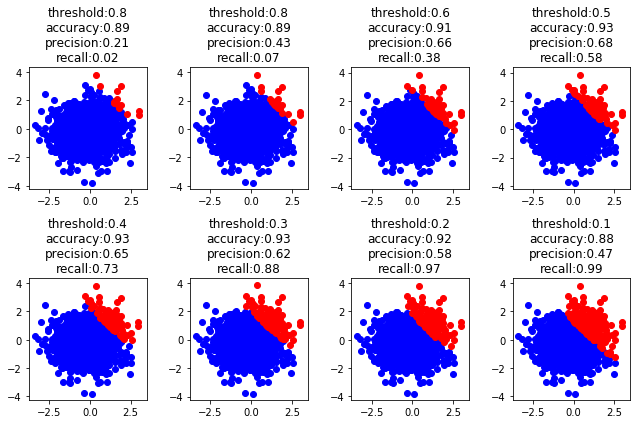

In [16]:
#利用dict的key值input threshold, value值input為subplot的index，例如在這裏要畫出八張圖
#247個數字代表的意思為：
# 24 -> 形成2x4個subplot; 7 -> 圖上從左上角開始往右邊數的index
plot_dict = {0.85:241,0.8:242,0.6:243,0.5:244,0.4:245,0.3:246,0.2:247,0.1:248} 
# 自訂的function會回傳不同threshold的f1_score, tpr, fpr, precision和 recall
f1_0, tpr0, fpr0, precision0, recall0 = tune_threshold('Logistic', plot_dict, X_test, y_test )

#  Precision & Recall & F1_Score
圖形化 Precsion Recall curve，並在個點旁邊標出對應的f1_score 

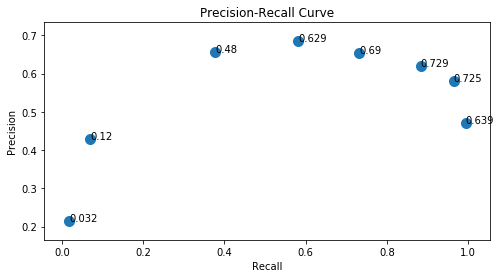

In [17]:
rcParams['figure.figsize'] = 8, 4
plt.scatter(recall0 ,precision0, s=100)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
# Show F1 Score on each point
for i, txt in enumerate(f1_0):
    plt.annotate(txt, (recall0[i],precision0[i])) 


plt.show()

# 7. Better Model
SVM with Varied threshold

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


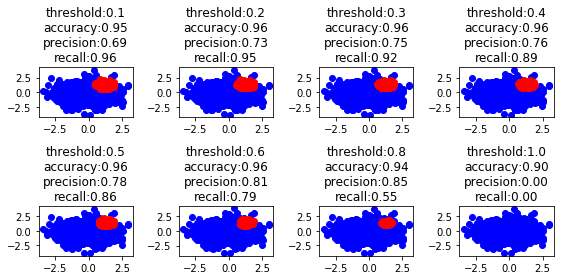

In [18]:
plot_dict = {0.1:241,0.2:242,0.3:243,0.4:244,0.5:245,0.6:246,0.8:247,1:248}
f1_1, tpr1, fpr1, precision1, recall1 = tune_threshold('SVC', plot_dict, X_test, y_test )

# Compare Performance between Logistic Regression & SVM
比較logistic regression和SVM的auc，大家應該可以清楚地看出來哪個模型在這個問題中表現比較好。

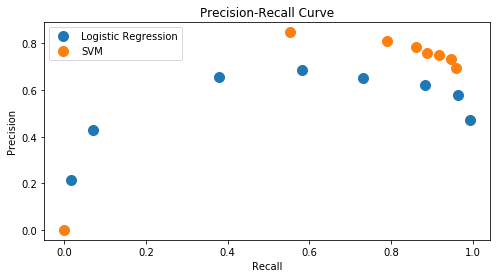

In [19]:
plt.plot(recall0, precision0, '.', label = 'Logistic Regression', markersize=20)
plt.plot(recall1, precision1, '.', label = 'SVM', markersize=20)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()